In [34]:
#install.packages("igraph") 
#install.packages("network") 
#install.packages("sna")
#install.packages("ggraph")
#install.packages("visNetwork")
#install.packages("threejs")
#install.packages("networkD3")
#install.packages("ndtv")

In [35]:
library(igraph)

In [36]:
#install.packages('maps')
#install.packages('geosphere')
library(maps)
library(geosphere)

In [37]:
airports <- read.csv('10Nodes.csv', header = TRUE)
flights <- read.csv('10Edges.csv', header = TRUE, as.is = TRUE)
head(airports)
head(flights)

ID,Label,Code,City,latitude,longitude,ToFly,Visits
0,NA,DEN,Denver,39.86167,-104.67306,NA,120
1,NA,ATL,Atlanta,33.63667,-84.42806,NA,102
2,NA,LAX,Los Angles,33.94250,-118.40722,NA,102
3,NA,DFW,Dallas-Ft. Worth,32.89694,-97.03806,NA,99
4,NA,ORD,Chicago,41.97861,-87.90472,NA,129
5,NA,LGA,New York City,40.76667,-73.86667,NA,123


Source,Target,Freq
0,1,87
0,2,117
0,3,84
0,4,103
0,5,82
0,6,65


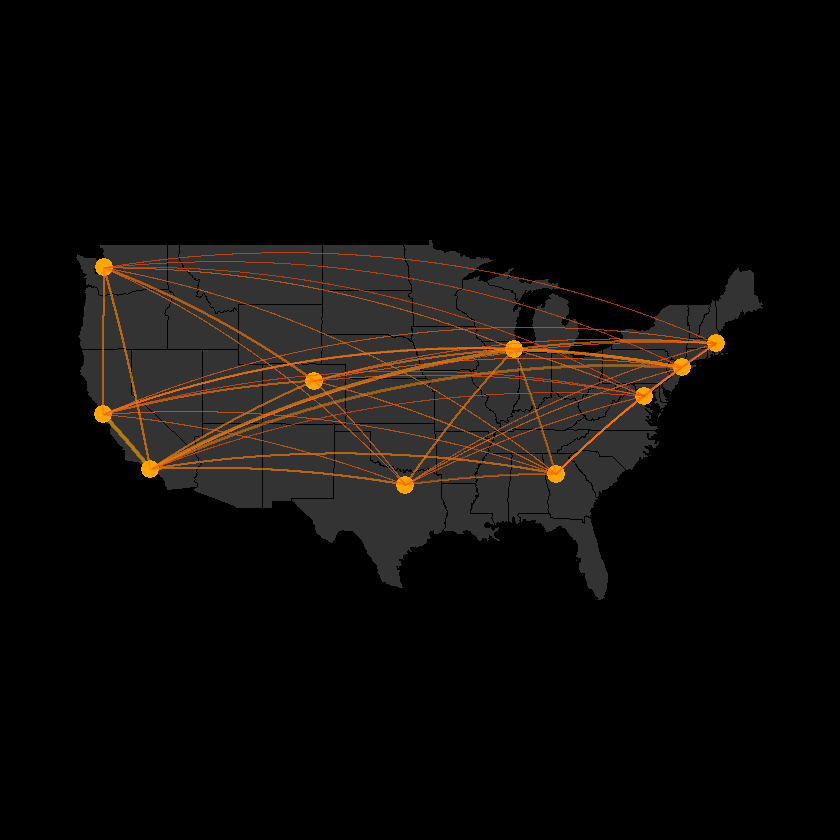

In [40]:
# Plot a map of the united states:
map("state", col="grey20", fill=TRUE, bg="black", lwd=0.1)

# Add a point on the map for each airport:
points(x=airports$longitude, y=airports$latitude, pch=19, 
       cex=2, col='orange')

col.1 <- adjustcolor("orange red", alpha=0.4)
col.2 <- adjustcolor("orange", alpha=0.4)
edge.pal <- colorRampPalette(c(col.1, col.2), alpha = TRUE)
edge.col <- edge.pal(100)

for(i in 1:nrow(flights))  {
    node1 <- airports[airports$ID == flights[i,]$Source,]
    node2 <- airports[airports$ID == flights[i,]$Target,]
    
    arc <- gcIntermediate( c(node1[1,]$longitude, node1[1,]$latitude), 
                           c(node2[1,]$longitude, node2[1,]$latitude), 
                           n=1000, addStartEnd=TRUE )
    edge.ind <- round(100*flights[i,]$Freq / max(flights$Freq))
    
    lines(arc, col=edge.col[edge.ind], lwd=edge.ind/30)
}

In [41]:
centrality = c(436.8, 453.5, 505.8, 424.7, 493.0, 453.1, 393.9, 323.2, 383.0, 451.8)
airports$Visits = centrality/3

In [42]:
pal = colorRampPalette(c('blue', 'red'))
airports$Col <- pal(10)[as.numeric(cut(airports$Visits,breaks = 10))]
head(airports)

ID,Label,Code,City,latitude,longitude,ToFly,Visits,Col
0,NA,DEN,Denver,39.86167,-104.67306,NA,145.6000,#AA0055
1,NA,ATL,Atlanta,33.63667,-84.42806,NA,151.1667,#C60038
2,NA,LAX,Los Angles,33.94250,-118.40722,NA,168.6000,#FF0000
3,NA,DFW,Dallas-Ft. Worth,32.89694,-97.03806,NA,141.5667,#8D0071
4,NA,ORD,Chicago,41.97861,-87.90472,NA,164.3333,#FF0000
5,NA,LGA,New York City,40.76667,-73.86667,NA,151.0333,#C60038


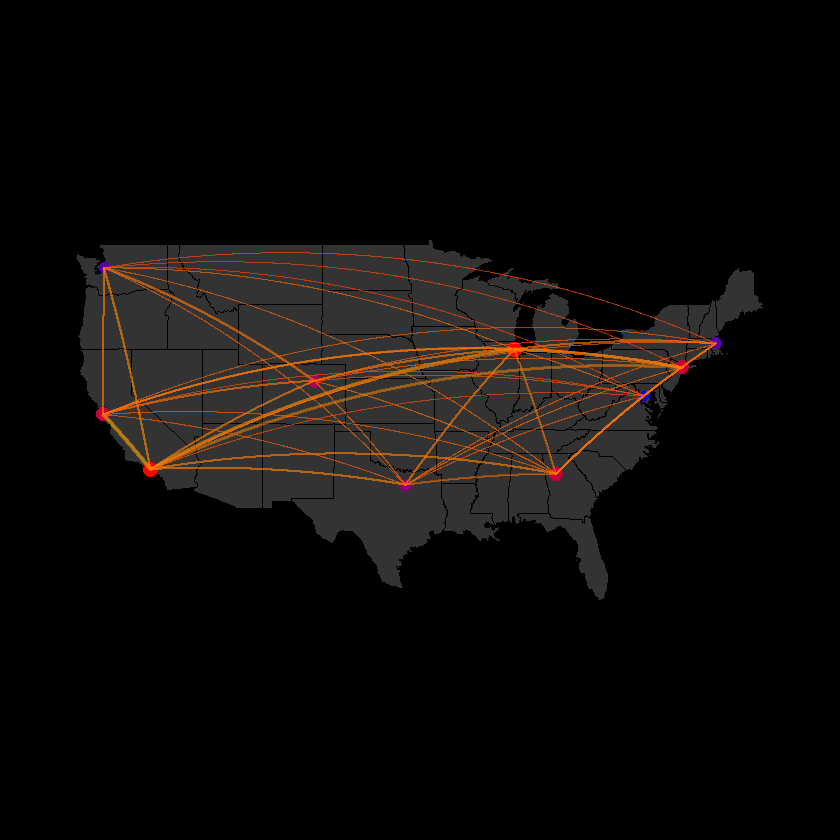

In [45]:
# Plot a map of the united states:
map("state", col="grey20", fill=TRUE, bg="black", lwd=0.1)

# Add a point on the map for each airport:
points(x=airports$longitude, y=airports$latitude, pch=19, 
       cex=airports$Visits/100, col=airports$Col)

col.1 <- adjustcolor("orange red", alpha=0.4)
col.2 <- adjustcolor("orange", alpha=0.4)
edge.pal <- colorRampPalette(c(col.1, col.2), alpha = TRUE)
edge.col <- edge.pal(100)

for(i in 1:nrow(flights))  {
    node1 <- airports[airports$ID == flights[i,]$Source,]
    node2 <- airports[airports$ID == flights[i,]$Target,]
    
    arc <- gcIntermediate( c(node1[1,]$longitude, node1[1,]$latitude), 
                           c(node2[1,]$longitude, node2[1,]$latitude), 
                           n=1000, addStartEnd=TRUE )
    edge.ind <- round(100*flights[i,]$Freq / max(flights$Freq))
    
    lines(arc, col=edge.col[edge.ind], lwd=edge.ind/30)
}

In [46]:
between = c(0.1962, 0.2105, 0.2376, 0.1871, 0.2296, 0.2016, 0.1814, 0.1579, 0.1716, 0.2024)
airports$Visits = between * 50

In [47]:
pal = colorRampPalette(c('blue', 'red'))
airports$Col <- pal(10)[as.numeric(cut(airports$Visits,breaks = 10))]
head(airports)

ID,Label,Code,City,latitude,longitude,ToFly,Visits,Col
0,NA,DEN,Denver,39.86167,-104.67306,NA,9.810,#71008D
1,NA,ATL,Atlanta,33.63667,-84.42806,NA,10.525,#AA0055
2,NA,LAX,Los Angles,33.94250,-118.40722,NA,11.880,#FF0000
3,NA,DFW,Dallas-Ft. Worth,32.89694,-97.03806,NA,9.355,#5500AA
4,NA,ORD,Chicago,41.97861,-87.90472,NA,11.480,#E2001C
5,NA,LGA,New York City,40.76667,-73.86667,NA,10.080,#8D0071


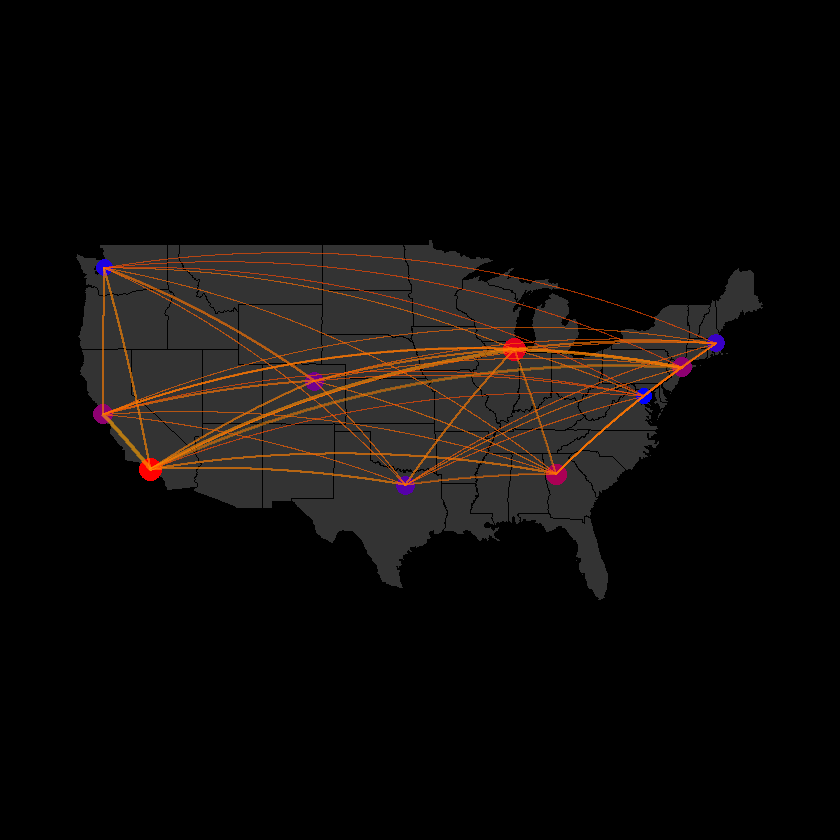

In [48]:
# Plot a map of the united states:
map("state", col="grey20", fill=TRUE, bg="black", lwd=0.1)

# Add a point on the map for each airport:
points(x=airports$longitude, y=airports$latitude, pch=19, 
       cex=airports$Visits/4.55, col=airports$Col)

col.1 <- adjustcolor("orange red", alpha=0.4)
col.2 <- adjustcolor("orange", alpha=0.4)
edge.pal <- colorRampPalette(c(col.1, col.2), alpha = TRUE)
edge.col <- edge.pal(100)

for(i in 1:nrow(flights))  {
    node1 <- airports[airports$ID == flights[i,]$Source,]
    node2 <- airports[airports$ID == flights[i,]$Target,]
    
    arc <- gcIntermediate( c(node1[1,]$longitude, node1[1,]$latitude), 
                           c(node2[1,]$longitude, node2[1,]$latitude), 
                           n=1000, addStartEnd=TRUE )
    edge.ind <- round(100*flights[i,]$Freq / max(flights$Freq))
    
    lines(arc, col=edge.col[edge.ind], lwd=edge.ind/30)
}

In [49]:
centpent = centrality/mean(centrality)
centpent
betpent = between/mean(between)
betpent
centpent-betpent

[1] 1.0113921 1.0500602 1.1711587 0.9833750 1.1415208 1.0491340 0.9120589
 [8] 0.7483560 0.8868204 1.0461239

[1] 0.9929652 1.0653373 1.2024900 0.9469103 1.1620021 1.0202945 0.9180627
 [8] 0.7991295 0.8684650 1.0243433

[1]  0.01842682 -0.01527711 -0.03133135  0.03646474 -0.02048133  0.02883947
 [7] -0.00600375 -0.05077349  0.01835541  0.02178059